# Feynman's trick in Sympy: *Speeding up significantly the integral evaluation*
_The following text is not a solution or even a sketch of one. It is merely a motivation for finding it._

Consider the following &mdash; kind of easy looking &mdash; integral:

$$I = \int_0^1\frac{x^2-1}{\ln x}\,\mathrm{d}x$$

Can you solve it by some standard technique you learned in school? If the answer is yes, then congratulations. But I have a hard time believing you. Rather, let's ask Sympy to solve it for us. 


In [2]:
from sympy import Symbol, ln, integrate

x = Symbol('x')
f = (x**2-1)/ln(x)

integrate(f, (x, 0, 1))

log(3)

Great! We got our result. However, the computation took a few seconds. On my antique machine &mdash; iMac with Intel 4-Core i5 @2.7 GHz CPU &mdash; Sympy needed about 4 seconds to spit out the answer. Let's "time it" more precisely:

In [2]:
%%timeit
integrate(f, (x, 0, 1))

3.89 s ± 86.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


So, yes. As we see, Sympy on my Star Trek abacus needs about 4 seconds to evaluate this integral. We shall explain all the steps in a moment, but let's see what happens if we use Feynman's trick, using so-called differentiation under the integral sign.

In [3]:
t = Symbol('t', real=True, nonnegative=True)
# Due to Sympy's limitations, we need to declare that t is non-negative
# even though -- as we are going to see -- t can lie in interval (-1, 0) 
It = (x**t-1)/ln(x)
dIt = integrate(It.diff(t), (x, 0, 1))
It2 = integrate(dIt, (t, 0, 2))

It2

log(3)

Voilà. We have obtained the same result, and what's more, if you run the cell above yourself the calculation feels faster. Much faster. Run `%%timeit` magic function once again.

In [4]:
%%timeit
dIt = integrate(It.diff(t), (x, 0, 1))
It2 = integrate(dIt, (t, 0, 2))

20.7 ms ± 127 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


20 ms vs. circa 4 seconds (4 000 ms)! That is 200x speed-up! That's insane. 

Just for the sake of curiosity, let's change the Jupyter kernel from Python to Mathematica (Wolfram Engine) and see how long it will take her to finish this integral:

In [1]:
Timing[Integrate[(x^2 - 1)/Log[x], {x, 0, 1}]]

{2.45455, Log[3]}

About 2 seconds &mdash; that is not great either and, to be honest, I am shocked that Mathematica is struggling here, too. The calculation was way slower than our Python implementation of Feynman's trick! 

### Parametrization: Introducing a new variable $t$

We sort of cheated in the Python code above &mdash; however, we will address that later. But what was the essential point? We applied the following transformation:

$$I = \int_0^1\frac{x^2-1}{\ln x}\,\mathrm{d}x,$$
$$ I \rightarrow I(t) := \int_0^1\frac{x^t-1}{\ln x}\,\mathrm{d}x$$

replacing the exponent 2 with a new variable, or a parameter, $t$. The reason behind it is that we hope to get a simpler expression after differentiation of the generalized integral with respect to $t$.

### Differentation Under The Integral Sign

In the second step, we used the identity

$$I'(t)\equiv\frac{\mathrm{d}}{\mathrm{d}t}\int_a^b f(x, t)\,\mathrm{d}x = \int_a^b\frac{\partial}{\partial t}f(x, t)\,\mathrm{d}x$$

which is satisfied if $f(x, t)$ is a continuous and continuously differentiable.


The idea of differentiation with respect to the new parameter is that we might get a more friendly expression. Let's do that, just recall that $\partial_t(x^t) = x^t\ln x\,$ and notice that the second term $-1/\ln x$ is constant with respect to $t$ so its derivative vanishes. Putting it all together, we get 

$$\frac{\partial}{\partial t}\frac{x^t-1}{\ln x} = x^t,$$
$$\int_0^1\frac{\partial}{\partial t}\frac{x^t-1}{\ln x}\,\mathrm{d}x = \int_0^1 x^t\,\mathrm{d}x.$$

This integral is really easy to calculate, right? 

$$\int_0^1 x^t\,\mathrm{d}x = \left[\frac{x^{t+1}}{t+1}\right]_0^1 =\frac{1}{t+1}.$$

We have now come to a point where we know that $I'(t) = 1/(t+1)$. Its antiderivative is so simple that without further ado we write

$$I(t) = \ln(t+1) + C,\, t\gt -1.$$

A hairsplitter would say that the primitive function in fact equals to $\ln(|t+1|) + C,\, t\in\mathbb{R}\setminus \{-1\}$. Yes, congratulations on this but for $t\leq -1$ the original integral does not converge on $(0, 1)$ (just think of the last integral above, and you will see it).

### Convenient Integral Values and The Constant
Most of the texts on Feynman's trick at this point go on like "we can easily see that..." in order to find the integration constant. It might be convenient, however sometimes I doubt it's "easy". Even though it might be "easy", it's easy for humans but not for computers. If we look at the definition we used, i.e. $I(t):=\int_0^1\frac{x^t-1}{\ln x}\,\mathrm{d}x$, "we can easily see that" for $I(0) = \int_0^1\frac{x^0-1}{\ln x}\,\mathrm{d}x = \int_0^1\frac{1-1}{\ln x}\,\mathrm{d}x = 0\cdot\int_0^1\frac{1}{\ln x}\,\mathrm{d}x = 0$.

As promised, from here we obtain the constant of integration,

$$I(0) = \ln(1) + C = 0 \Rightarrow C=0.$$

And so we have found that

$$I(t) = \ln(t+1) \Rightarrow I(2) = \ln 3,$$
$$\underline{\underline{ \int_0^1\frac{x^2-1}{\ln x}\,\mathrm{d}x = \ln\,3}}.$$

What's more, we have found a general relationship holding for $t \gt -1$:

$$\boxed{I(t) := \int_0^1\frac{x^t-1}{\ln x}\,\mathrm{d}x = \ln(t+1)} $$

which means we can instantly find integrals like

$$\int_0^1\frac{x-1}{\ln(x)}\,\mathrm{d}x,\, \int_0^1\frac{x^3-1}{\ln x}\,\mathrm{d}x,\, \int_0^1\frac{x^6-1}{\ln x}\,\mathrm{d}x\,\ldots$$

Their values are $\ln 1 = 0, \ln 4, \ln 7\ldots$

We can even evaluate $I(-1/2)$:

$$\int_0^1\frac{x^{-\frac{1}{2}}-1}{\ln x}\,\mathrm{d}x = \ln\left(-\frac{1}{2} + 1\right) = \ln(2^{-1}) = -\ln 2.$$


Let's try Sympy again to see if it is able to find the right answer.

In [5]:
g = (x**(-1/2)-1)/ln(x)

integrate(g, (x, 0, 1))

-log(2)

It did find it. However, it feels even slower than for $I(t=2)$. And really, when we run `%%timeit` we see that:

In [6]:
%%timeit
integrate(g, (x, 0, 1))

6.86 s ± 1.29 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


And also retry Mathematica to see how much time she needs for this integral:

In [1]:
Timing[Integrate[(x^(-1/2) - 1)/Log[x], {x, 0, 1}]]

{2.6242, -Log[2]}

### The Fundamental Theorem of Calculus to Help
Above, we were able to see that $I(0) = 0$ which implied $C=0$. As we said, computers generally do not "see" that. With the help of Deep Learning you can push things further but that is another story. 

We can get rid of the integration constant by focusing on the well known relationship from calculus (the constants cancel out)

$$\int_a^b f(t)\,\mathrm{d}t = F(b) - F(a)$$

Then we are looking for

$$\int_a^t I'(t)\,\mathrm{d}t = I(t) - I(a)$$

such that $I(a)$ vanishes.

$$I(a) = \ln(a+1) = 0 \Leftrightarrow a=0 $$

which does correspond to $I(0) = 0$ from above. 

That is why we said that we cheated in the code: we used `I2 = integrate(dI, (t, 0, 2))` meaning $I(2) = \int_0^2 I'(t)\,\mathrm{d}t$, even though we did not know the lower limit back then.

### Using Sympy Solvers
From a practical point of view it means that in our simple code we need to introduce one of Sympy solvers, e.g. `solve` or `solveset`. Yes, if the antiderivate in question has no roots we are "scroot"...

In [3]:
from sympy import solveset

x = Symbol('x')
t = Symbol('t', real=True, nonnegative=True)
f = (x**t-1)/ln(x)

dI = integrate(f.diff(t), (x, 0, 1))
It = integrate(dI, t)

sol = solveset(It, t) # Finding I(a) == 0
if sol:
    a = sol.args[0]
    I2 = integrate(dI, (t, a, 2)) # I(2)
else:
    raise ValueError('The antiderivative I(t) does not have any root.')

I2


log(3)

### Discussion
This was a straightforward example of Feynman's integration trick, illustrating the core principle we've outlined. However, the procedure can sometimes involve taking limits instead of relying on solvers, or we may need to apply the trick more than once. Additionally, determining which part of the integral to parametrize often requires experimentation. Typically, we also need to incorporate techniques such as integration per partes (by parts), substitutions, or even various transforms.

It all applies to the original integral as well. Feynman's trick helps us to obtain a simpler mathematical expression for further integration, but it is not a magic wand that allows one (or a computer) to avoid using any integration methods. Integration under the integral sign often leads to integrals that can be found in tables, but they are not necessarily the simplest ones. Then, it again depends on the capabilities of the CAS algorithms, in this case, Sympy.

$$\int_0^\infty \frac{\sin x}{x} = \frac{\pi}{2}$$

Sympy can quickly solve some of these unusual integrals. This so-called Dirichlet integral is typically solved using the Laplace transform and/or Feynman's trick. Sympy computes it in an instant &mdash; in a few miliseconds!

In [4]:
from sympy import sin, oo

integrate(sin(x)/x, (x, 0, oo))

pi/2

In [5]:
%%timeit
integrate(sin(x)/x, (x, 0, oo))

4.57 ms ± 16.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


And let's look at another integral with a beautiful result &mdash; again, it can be solved using Feynman's trick, but &mdash; surprisingly &mdash; Sympy calculates it quickly on its own.

$$\int_{-\infty}^\infty \frac{\cos x}{x^2+1}\,\mathrm{d}x=\frac{\pi}{e}$$

In [6]:
from sympy import cos

integrate(cos(x)/(x**2 + 1), (x, -oo, oo)).simplify()

pi*exp(-1)

In [7]:
%%timeit
integrate(cos(x)/(x**2 + 1), (x, -oo, oo))

145 ms ± 7.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


On the other hand, let's examine a fairly simple integral, which can be solved using either Feynman's trick or by parts.

$$\int_0^1 x^{\frac{4}{3}} \ln x\,\mathrm{d}x$$

We'll first use Feynman's method. However, we can skip the initial step since the integrand is already in the desired form. That's because $x^t\ln x = \partial_t (x^t)$. In fact, we're proceeding backwards:

$$I(t) := \int_0^1 x^t \ln x\,\mathrm{d}x = \int_0^1 \frac{\partial}{\partial t}x^t\,\mathrm{d}x=\frac{\mathrm{d}}{\mathrm{d}t}\int_0^1 x^t\,\mathrm{d}x,$$
$$I(t) = \frac{\mathrm{d}}{\mathrm{d}t} \left[\frac{x^{t+1}}{t+1}\right]_0^1 = \frac{\mathrm{d}}{\mathrm{d}t}\left(\frac{1}{t+1}\right) \Rightarrow$$
$$\boxed{I(t) = -\frac{1}{(t+1)^2},\,\, t\gt-1.} $$
$$\int_0^1 x^{\frac{4}{3}} \ln x\,\mathrm{d}x = I\left(\frac{4}{3}\right) = -\frac{9}{49}.$$

As you can see, this integral can essentially be calculated in a single line. That is true even for per partes (by parts) method: $v'=x^{4/3} \Rightarrow v = 3/7\,x^{7/3}$ and $u = \ln x \Rightarrow u' = 1/x$.

$$\int_0^1 x^{\frac{4}{3}} \ln x\,\mathrm{d}x = \left[\frac{3}{7}x^{7/3}\ln x\right]_0^1 - \frac{3}{7}\int_0^1\frac{x^{7/3}}{x}\mathrm{d}x = $$
$$ = 0 - \frac{3}{7}\int_0^1 x^{4/3}\mathrm{d}x = -\frac{3}{7}\cdot\frac{3}{7}\left[x^{7/3}\right]_0^1 = -\frac{9}{49}.$$

<s>Even though this integral belongs among one-liners, Sympy struggles with it &mdash; and big time</s>:

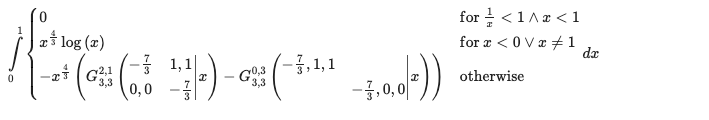

In [8]:
from IPython import display
display.Image("./integral_chyba_sympy.png")

In [9]:
# Note: Now it is fixed
from sympy import Rational
x = Symbol('x')
integrate(x**Rational(4, 3)*ln(x), (x, 0, 1))

-9/49

We used `Rational(4, 3)` as a fraction 4/3 would make Sympy think of the exponent as a float and an error would be rised (`PolynomialError: RisingFactorial(_t + 3.33333333333333, 1.0) contains an element of the set of generators.`)

In any case, Sympy returned a rather wild result, which isn't correct and isn't a result either. However, it's interesting to note that when we input numbers into Rational such that their ratio is a natural number, the computation proceeds without any issues.

In [10]:
integrate(x**Rational(4, 2)*ln(x), (x, 0, 1))

-1/9

This agrees with our formula $I(t) = -1/(t+1)^2$, $I(2) = - 1/3^2 = -1/9$. This simply seems to be some kind of bug in Sympy and should be addressed. Update: [I reported the bug](https://github.com/sympy/sympy/issues/26930) and it is going to be fixed in the upcoming release (my guess is Sympy 1.13.2).

### If you want a really fast computation...
use numerical integration. Symbolic results in mathematics are always beautiful, as seen in the example above, where integration gave us $\pi/e$. However, in practical applications, we often need specific numerical values. In such cases, it's far more appropriate to opt for numerical integration, which can handle a much broader range of integrals (including those that are analytically unsolvable or very difficult to solve) and can compute them very quickly.

Sympy itself has only one external dependency—mpmath. And we can use this library for numerical integration. For example, our integral can be computed like this:

In [11]:
from mpmath import mp
f = lambda x: (x**2-1)/mp.log(x)
int_f = mp.quad(f, [0, 1])
print(int_f)

1.09861228866811


If you're using Sympy, it's quite likely that you're also familiar with Numpy and Scipy. With these libraries, numerical integration is even faster:

In [12]:
import numpy as np
from scipy.integrate import quad

f = lambda x: (x**2-1)/np.log(x)
int_f = quad(f , 0, 1)
int_f # Second member of the tuple refers to an absolute error estimate

(1.0986122886682985, 5.4702065099832e-10)

In [13]:
%%timeit
int_f = quad(f, 0, 1)

557 µs ± 9.24 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Let's compare the value of the integral obtained using the numerical method with the numerical value of 
$\log 3$:

In [14]:
int_f[0], np.log(3)

(1.0986122886682985, 1.0986122886681098)

From seconds to microseconds &mdash; not bad!

| Numerical                 | Feynman               | Sympy alg.      |
| ------------------------- | --------------------- | --------------- |
| $O(100\, \mathrm{\mu s})$ | $O(10\, \mathrm{ms})$ | $O(\mathrm{s})$ |